# Health care cost prediction 

# Import libraries

In [40]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from ipywidgets import widgets
import plotly.express as px
import plotly.offline as pyo
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics
from sklearn.metrics import mean_absolute_error



# Load and Inspect the Data
## Load the Data


In [41]:
health = pd.read_csv("Health_service.csv")

In [42]:
# Check the top 5 rows
health.head()

,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Attending Provider License Number,Other Provider License Number,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,Western NY,Erie,1427000,280,Bertrand Chaffee Hospital,18 to 29,140,F,White,Not Span/Hispanic,...,Moderate,Minor,Medical,Private Health Insurance,163390,166116,0,Y,$7108.00,$3913.96
1,Western NY,Genesee,1801000,339,United Memorial Medical Center North Street Ca...,18 to 29,140,F,White,Not Span/Hispanic,...,Minor,Minor,Surgical,Blue Cross/Blue Shield,216110,216110,0,N,$18143.55,$5776.46
2,Western NY,Genesee,1801000,339,United Memorial Medical Center North Street Ca...,50 to 69,140,M,Other Race,Spanish/Hispanic,...,Minor,Minor,Medical,Self-Pay,215786,90016551,0,Y,$5536.92,$1855.02
3,Western NY,Genesee,1801000,339,United Memorial Medical Center North Street Ca...,30 to 49,140,F,Other Race,Not Span/Hispanic,...,Major,Major,Medical,Medicaid,265859,90335640,0,Y,$8135.23,$3242.32
4,Western NY,Genesee,1801000,339,United Memorial Medical Center North Street Ca...,70 or Older,144,F,White,Not Span/Hispanic,...,Moderate,Moderate,Medical,Medicare,265859,90335640,0,Y,$4016.86,$1117.80


In [43]:
# Check the dimension of the dataframe
health.shape

(67928, 32)

## Inspect the DataFrame with the info() method

In [44]:
# Check data types
health.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67928 entries, 0 to 67927
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Health Service Area                  67928 non-null  object
 1   Hospital County                      67928 non-null  object
 2   Operating Certificate Number         67928 non-null  int64 
 3   Facility Id                          67928 non-null  int64 
 4   Facility Name                        67928 non-null  object
 5   Age Group                            67928 non-null  object
 6   Zip Code - 3 digits                  67928 non-null  object
 7   Gender                               67928 non-null  object
 8   Race                                 67928 non-null  object
 9   Ethnicity                            67928 non-null  object
 10  Length of Stay                       67928 non-null  int64 
 11  Type of Admission                    6792

## There are many categorical variables in the data. This will be converted to numerical float data later on

##  Check for missing values

In [45]:
### Checking for missing values

# Another way
# Let's loop through the data and see if there is anything missing

for col in health.columns:
    pct_missing = np.mean(health[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Health Service Area - 0%
Hospital County - 0%
Operating Certificate Number - 0%
Facility Id - 0%
Facility Name - 0%
Age Group - 0%
Zip Code - 3 digits - 0%
Gender - 0%
Race - 0%
Ethnicity - 0%
Length of Stay - 0%
Type of Admission - 0%
Patient Disposition - 0%
CCS Diagnosis Code - 0%
CCS Diagnosis Description - 0%
CCS Procedure Code - 0%
CCS Procedure Description - 0%
APR DRG Code - 0%
APR DRG Description - 0%
APR MDC Code - 0%
APR MDC Description - 0%
APR Severity of Illness Code - 0%
APR Severity of Illness Description - 0%
APR Risk of Mortality - 0%
APR Medical Surgical Description - 0%
Payment Typology 1 - 0%
Attending Provider License Number - 0%
Other Provider License Number - 0%
Birth Weight - 0%
Emergency Department Indicator - 0%
Total Charges - 0%
Total Costs - 0%


# Exploration Data Analysis before model building

### Convert the variables Total charges and Total costs to numeric float

In [46]:
health["Total Charges"] = health["Total Charges"].apply(lambda s: float(s[1:]))

In [47]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67928 entries, 0 to 67927
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Health Service Area                  67928 non-null  object 
 1   Hospital County                      67928 non-null  object 
 2   Operating Certificate Number         67928 non-null  int64  
 3   Facility Id                          67928 non-null  int64  
 4   Facility Name                        67928 non-null  object 
 5   Age Group                            67928 non-null  object 
 6   Zip Code - 3 digits                  67928 non-null  object 
 7   Gender                               67928 non-null  object 
 8   Race                                 67928 non-null  object 
 9   Ethnicity                            67928 non-null  object 
 10  Length of Stay                       67928 non-null  int64  
 11  Type of Admission           

In [48]:
health["Total Costs"] = health["Total Costs"].apply(lambda s: float(s[1:]))

In [49]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67928 entries, 0 to 67927
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Health Service Area                  67928 non-null  object 
 1   Hospital County                      67928 non-null  object 
 2   Operating Certificate Number         67928 non-null  int64  
 3   Facility Id                          67928 non-null  int64  
 4   Facility Name                        67928 non-null  object 
 5   Age Group                            67928 non-null  object 
 6   Zip Code - 3 digits                  67928 non-null  object 
 7   Gender                               67928 non-null  object 
 8   Race                                 67928 non-null  object 
 9   Ethnicity                            67928 non-null  object 
 10  Length of Stay                       67928 non-null  int64  
 11  Type of Admission           

In [50]:
health.head() ## displays top 5 rows again

,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Attending Provider License Number,Other Provider License Number,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,Western NY,Erie,1427000,280,Bertrand Chaffee Hospital,18 to 29,140,F,White,Not Span/Hispanic,...,Moderate,Minor,Medical,Private Health Insurance,163390,166116,0,Y,7108.00,3913.96
1,Western NY,Genesee,1801000,339,United Memorial Medical Center North Street Ca...,18 to 29,140,F,White,Not Span/Hispanic,...,Minor,Minor,Surgical,Blue Cross/Blue Shield,216110,216110,0,N,18143.55,5776.46
2,Western NY,Genesee,1801000,339,United Memorial Medical Center North Street Ca...,50 to 69,140,M,Other Race,Spanish/Hispanic,...,Minor,Minor,Medical,Self-Pay,215786,90016551,0,Y,5536.92,1855.02
3,Western NY,Genesee,1801000,339,United Memorial Medical Center North Street Ca...,30 to 49,140,F,Other Race,Not Span/Hispanic,...,Major,Major,Medical,Medicaid,265859,90335640,0,Y,8135.23,3242.32
4,Western NY,Genesee,1801000,339,United Memorial Medical Center North Street Ca...,70 or Older,144,F,White,Not Span/Hispanic,...,Moderate,Moderate,Medical,Medicare,265859,90335640,0,Y,4016.86,1117.80


In [51]:
## Chck the statistics of the numerical variables
health.describe() 

,Operating Certificate Number,Facility Id,Length of Stay,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Attending Provider License Number,Other Provider License Number,Birth Weight,Total Charges,Total Costs
count,6.792800e+04,67928.000000,67928.000000,67928.000000,67928.000000,67928.000000,67928.000000,67928.000000,6.792800e+04,6.792800e+04,67928.000000,67928.000000,67928.000000
mean,3.874971e+06,673.737693,4.825315,188.655194,111.845807,419.675495,10.448681,2.023437,9.431406e+06,1.308147e+07,313.930927,23238.791793,11608.368696
std,2.294159e+06,400.206549,4.680266,153.631620,80.739833,234.430978,5.763976,0.888624,2.680376e+07,3.000116e+07,985.974688,19984.106810,10835.924017
min,1.010030e+05,4.000000,1.000000,1.000000,0.000000,4.000000,1.000000,1.000000,2.493000e+03,1.307000e+03,0.000000,1.000000,0.570000
25%,1.401013e+06,218.000000,2.000000,108.000000,42.000000,207.000000,5.000000,1.000000,1.835760e+05,1.835760e+05,0.000000,9141.350000,4293.742500
50%,3.201002e+06,589.000000,3.000000,157.000000,115.000000,383.000000,9.000000,2.000000,2.235500e+05,2.271450e+05,0.000000,16468.850000,8802.350000
75%,5.501001e+06,990.000000,6.000000,218.000000,179.000000,640.000000,15.000000,3.000000,2.637450e+05,2.639590e+05,0.000000,31268.150000,15351.985000
max,7.002026e+06,9250.000000,59.000000,917.000000,999.000000,952.000000,25.000000,4.000000,9.055259e+07,9.060222e+07,9800.000000,99923.720000,141539.210000


### Explore the type of admission column

In [52]:
all_health = (health.groupby(["Type of Admission"]).agg(occurence=("Type of Admission", "count"))).reset_index()
all_health

,Type of Admission,occurence
0,Elective,15325
1,Emergency,37806
2,Newborn,6364
3,Not Available,8
4,Trauma,24
5,Urgent,8401


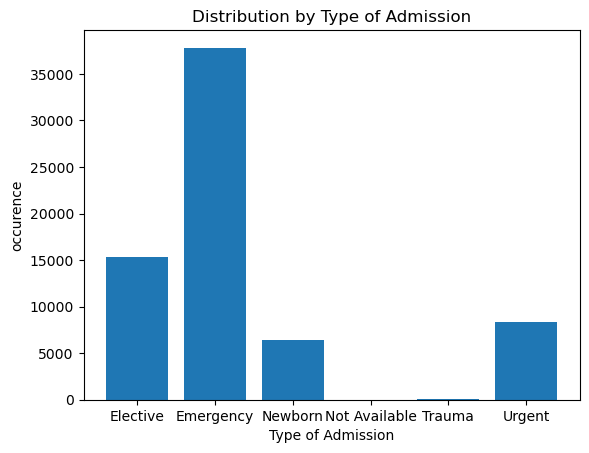

In [53]:
plt.bar(all_health['Type of Admission'], all_health['occurence'])
plt.title('Distribution by Type of Admission')
plt.xlabel('Type of Admission')
plt.ylabel('occurence')
plt.show()

### Emergency admission is more than half of the total admission

### Explore APR Risk of Mortality column

In [54]:
all_health1 = (health.groupby(["APR Risk of Mortality"]).agg(occurence=("APR Risk of Mortality", "count"))).reset_index()
all_health1

,APR Risk of Mortality,occurence
0,Extreme,3577
1,Major,10315
2,Minor,38663
3,Moderate,15373


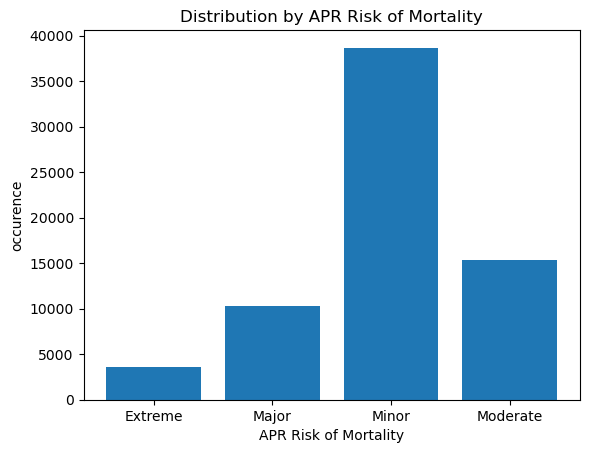

In [55]:
plt.bar(all_health1['APR Risk of Mortality'], all_health1['occurence'])
plt.title('Distribution by APR Risk of Mortality')
plt.xlabel('APR Risk of Mortality')
plt.ylabel('occurence')
plt.show()

## Minor risk of mortality is more prominent

## Explore the distribution of total costs and length of stay in hospitals

In [56]:
health["Length of Stay"] = health["Length of Stay"].apply(lambda s: float(s))

In [57]:
## Check length of stay in hospitals based on Type of Admission
health.groupby("Type of Admission").median()["Length of Stay"]

C:\Users\kazee\AppData\Local\Temp\ipykernel_45088\3562925031.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Type of Admission
Elective         3.0
Emergency        4.0
Newborn          2.0
Not Available    2.0
Trauma           3.0
Urgent           3.0
Name: Length of Stay, dtype: float64

Text(0, 0.5, 'Frequency')

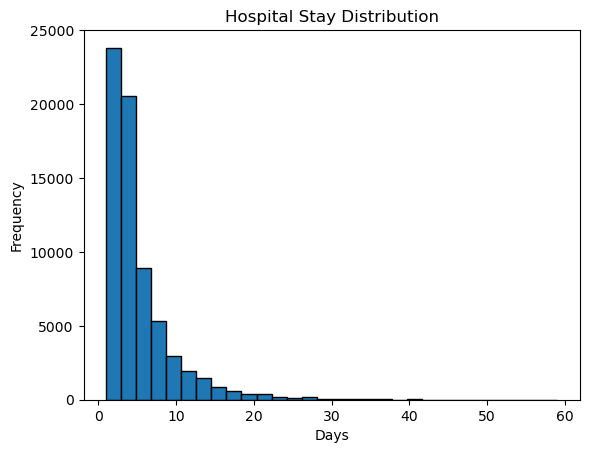

In [58]:
# Distribution of length of stay and tptal costs
plt.figure()
plt.hist(health["Length of Stay"], bins=30, edgecolor="black");
plt.title("Hospital Stay Distribution")
plt.xlabel("Days")
plt.ylabel("Frequency")


Text(0, 0.5, 'Frequency')

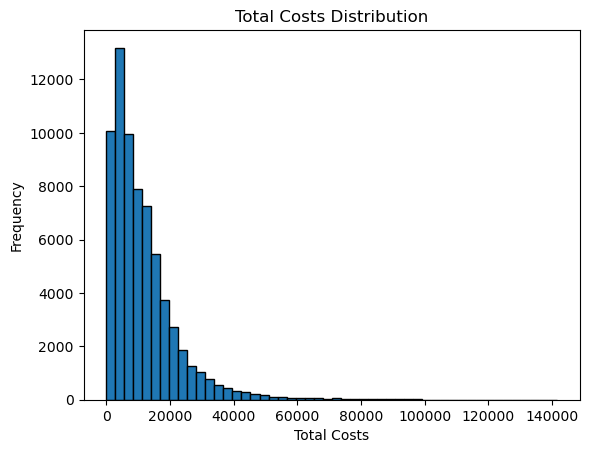

In [59]:
plt.figure()
plt.hist(health["Total Costs"], bins=50, edgecolor="black");
plt.title("Total Costs Distribution")
plt.xlabel("Total Costs")
plt.ylabel("Frequency")


## Build a correlation matrix with the numeric data columns

C:\Users\kazee\AppData\Local\Temp\ipykernel_45088\2445873598.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



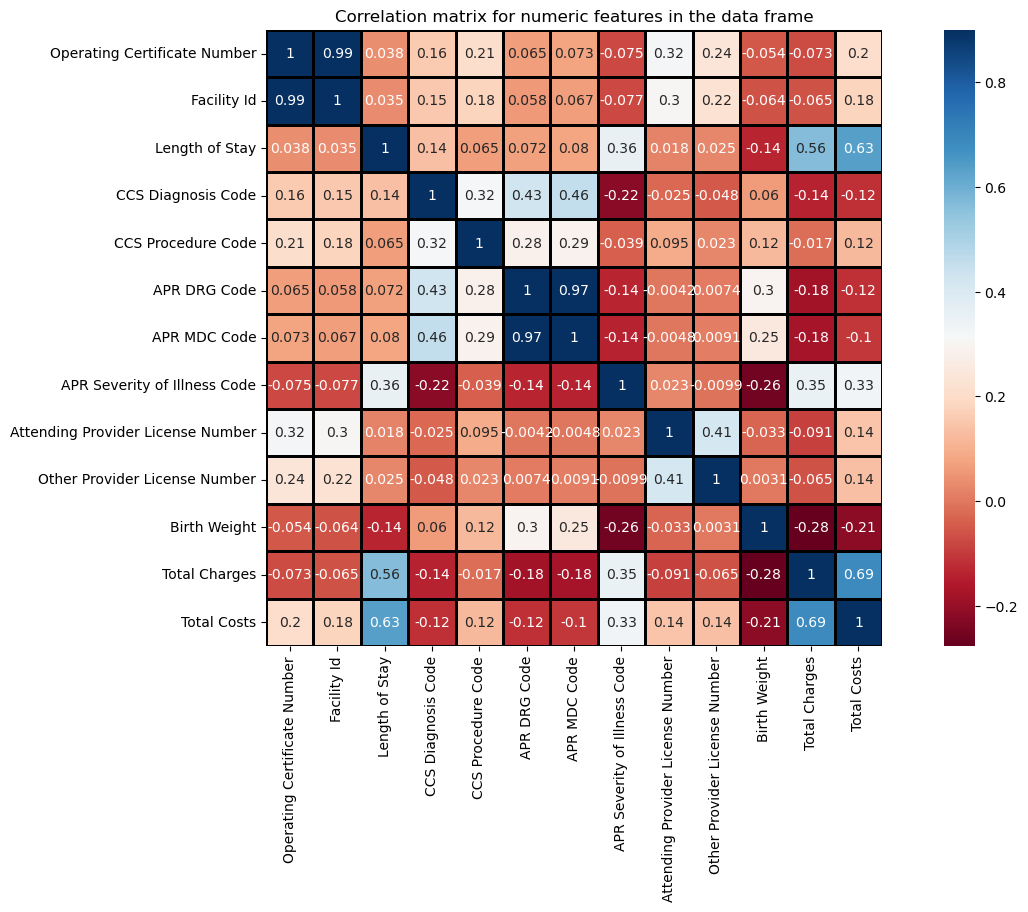

In [60]:
corr_matrix = health.corr()
plt.figure(figsize=(16,8))
sns.heatmap(corr_matrix, vmax=0.9, square=True, annot = True, cmap = "RdBu",  linewidths = 1,  linecolor = 'black',)
plt.title("Correlation matrix for numeric features in the data frame")
# plt.xlabel("X_axis")
# plt.ylabel("Y_axis")
plt.show()

### Length of stay, APR severity of illness code and Total charges correlated with the total hospital costs 

In [61]:
## Convert categorical features to numerical floats
encoder = LabelEncoder()

categorical_features = health.select_dtypes(include=['object']).columns

encoded_health = health.copy()

encoded_health[categorical_features] = encoded_health[categorical_features].apply(encoder.fit_transform)
encoded_health

,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Attending Provider License Number,Other Provider License Number,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,6,8,1427000,280,3,1,39,0,3,1,...,3,2,0,7,163390,166116,0,1,7108.00,3913.96
1,6,10,1801000,339,53,1,39,0,3,1,...,2,2,1,0,216110,216110,0,0,18143.55,5776.46
2,6,10,1801000,339,53,3,39,1,2,2,...,2,2,0,8,215786,90016551,0,1,5536.92,1855.02
3,6,10,1801000,339,53,2,39,0,2,1,...,1,1,0,4,265859,90335640,0,1,8135.23,3242.32
4,6,10,1801000,339,53,4,43,0,3,1,...,3,3,0,5,265859,90335640,0,1,4016.86,1117.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67923,4,30,5149000,895,20,4,16,1,3,1,...,1,3,1,5,210655,225020,0,1,79229.90,28512.62
67924,4,30,5149000,895,20,4,16,0,3,1,...,1,3,0,5,236434,236434,0,1,11920.33,3110.73
67925,4,30,5149000,895,20,1,16,0,3,1,...,3,2,0,0,266269,90008410,0,1,40497.44,9326.11
67926,4,30,5149000,895,20,2,16,0,3,1,...,3,2,0,4,237281,225020,0,1,39665.34,9497.60


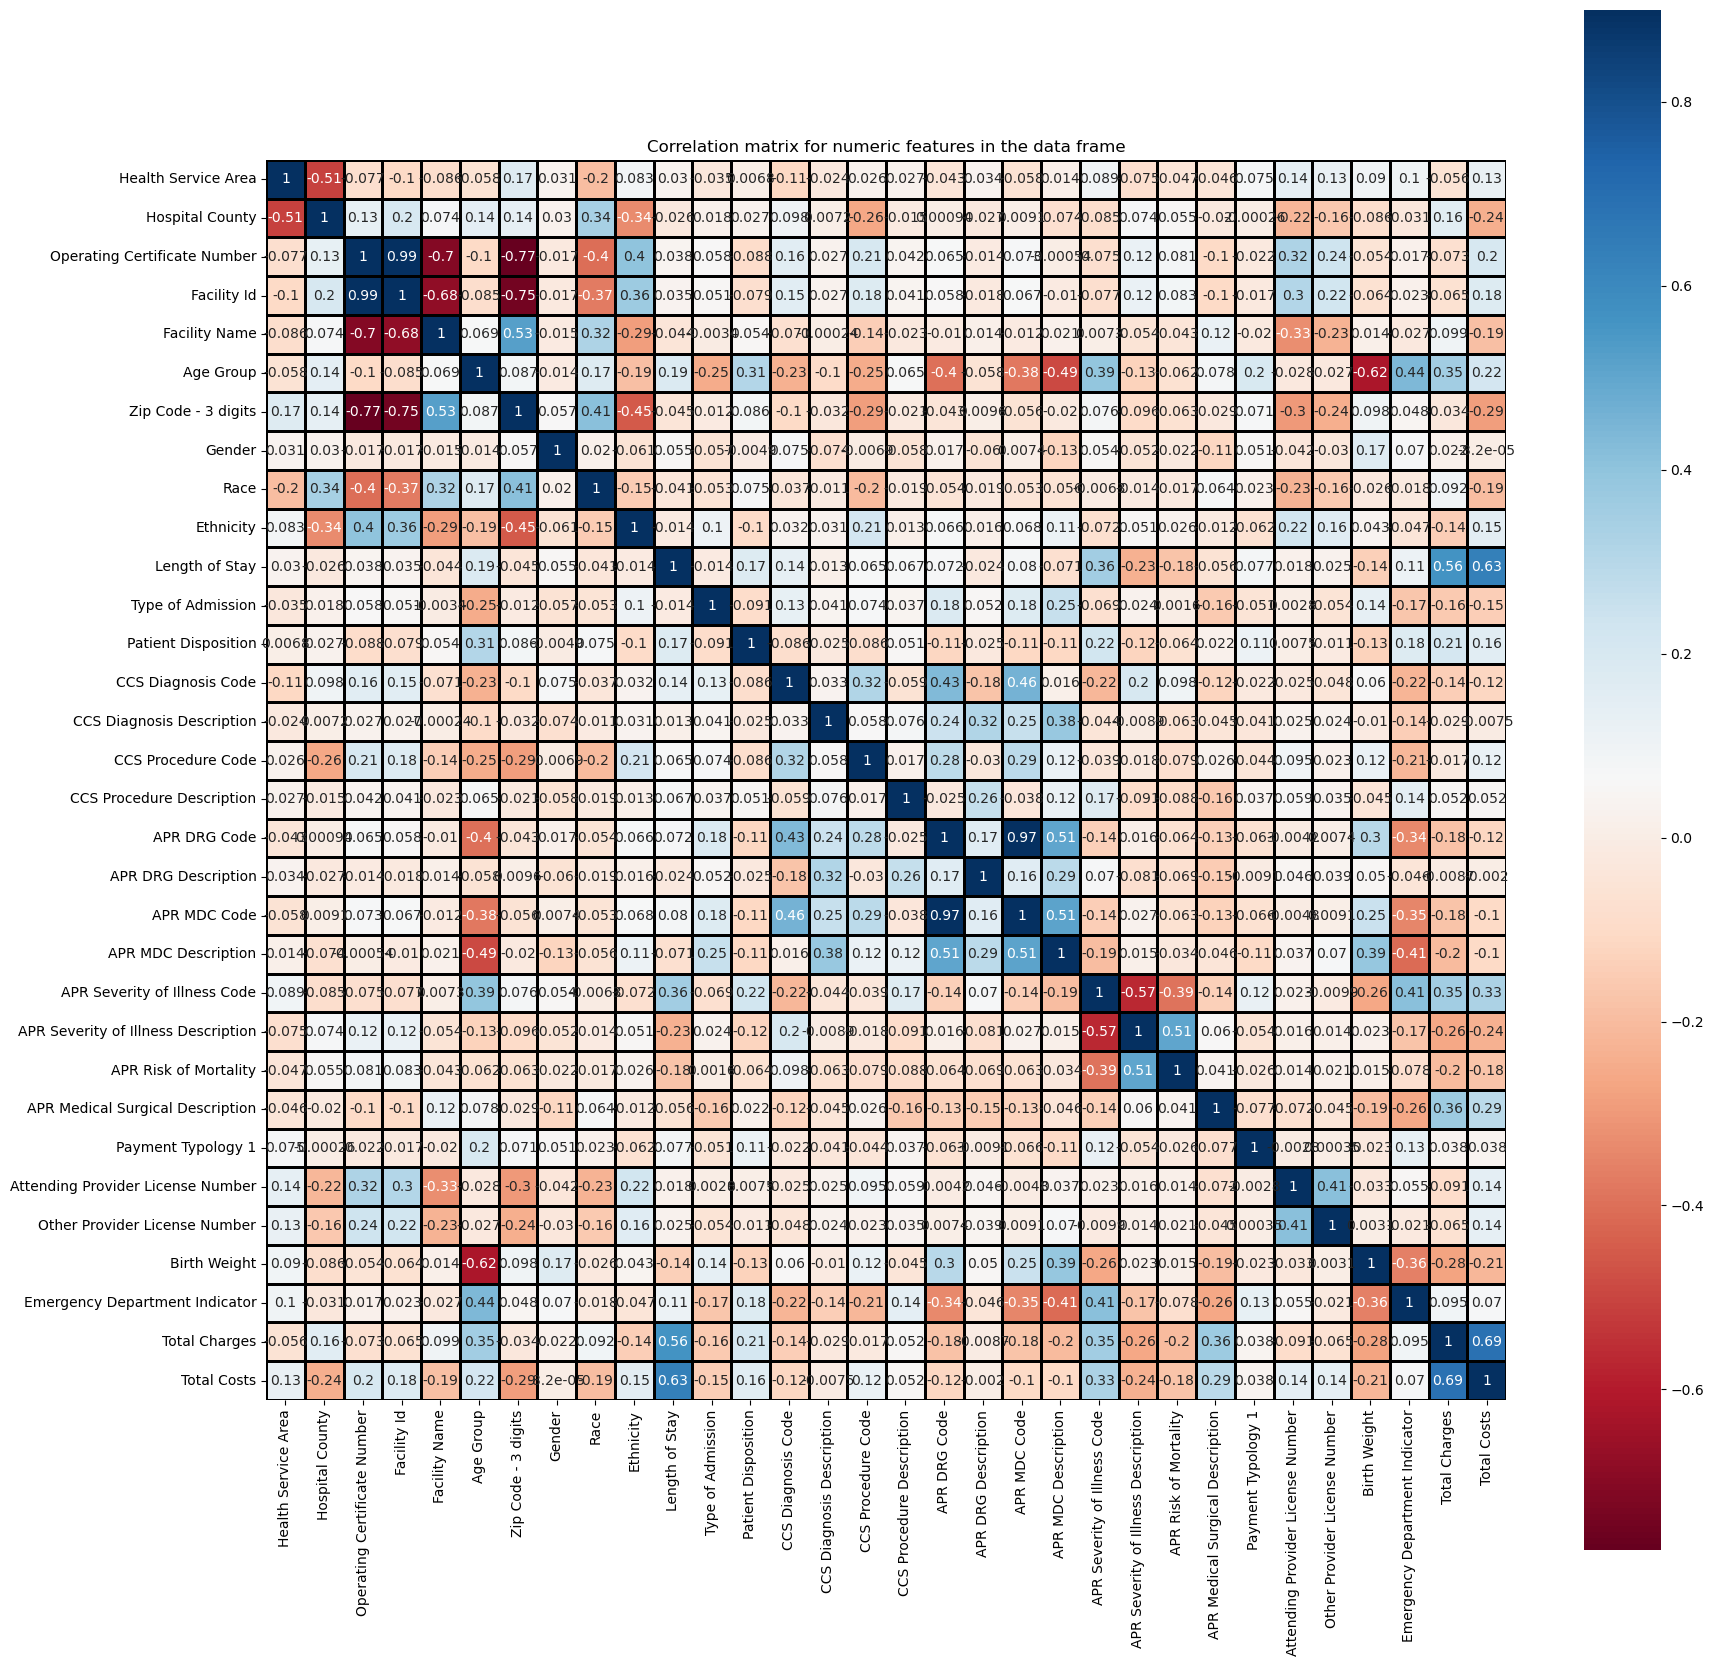

In [62]:
corr_matrix = encoded_health.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, vmax=0.9, square=True, annot = True, cmap = "RdBu",  linewidths = 1,  linecolor = 'black',)
plt.title("Correlation matrix for numeric features in the data frame")
# plt.xlabel("X_axis")
# plt.ylabel("Y_axis")
plt.show()

In [63]:
##corr_pairs = corr_matrix.unstack()

## print(corr_pairs)

In [64]:
## sorted_pairs = corr_pairs.sort_values(kind="quicksort")

## print(sorted_pairs)

In [65]:
## strong_pairs = sorted_pairs[(sorted_pairs) > 0.1]

## print(strong_pairs)

# Model Development

In [66]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

### Split the dataset into the training set (80%) and the test set (20%). Extract features and labels from both subsets (X_train, y_train, X_test, y_test).

In [67]:
# features and labelassignment

X, y = encoded_health.drop(["Total Charges", "Total Costs"], axis=1), encoded_health["Total Costs"]
 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42) 

# y_train = y_train.round(0)

In [68]:
X_train.head() ## Check train data

,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Attending Provider License Number,Other Provider License Number,Birth Weight,Emergency Department Indicator
28201,0,17,2801001,484,47,4,20,0,3,1,...,10,3,1,2,1,5,160800,160800,0,0
37009,3,24,3950000,752,36,3,4,0,3,1,...,4,2,3,3,1,0,242332,174289,0,1
34034,3,7,1327000,192,32,2,24,1,3,1,...,4,2,3,2,1,0,141836,192701,0,0
34745,3,7,1327000,192,32,0,24,1,3,1,...,21,1,2,2,0,0,198183,223646,4100,0
60714,5,2,7000001,1178,5,0,3,1,0,1,...,21,2,3,2,0,4,189435,189435,3600,0


In [69]:
y_train.head()

28201     8664.65
37009    24264.63
34034     8545.25
34745     1590.25
60714    28777.44
Name: Total Costs, dtype: float64

In [70]:
X_test.head()   ## Check test data

,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Attending Provider License Number,Other Provider License Number,Birth Weight,Emergency Department Indicator
7277,6,8,1401008,213,27,0,41,1,3,1,...,21,2,3,2,0,4,198096,60000197,1800,0
14165,6,8,1427000,280,3,4,40,0,3,1,...,3,2,3,3,0,5,90304559,90006296,0,1
59106,5,2,7000001,1178,5,4,3,1,0,1,...,12,3,1,1,0,5,132276,90274189,0,1
43443,3,31,5501001,990,16,3,23,1,3,1,...,4,4,0,0,1,3,275124,275124,0,1
35951,3,24,3950000,752,36,3,24,1,3,1,...,10,2,3,2,1,0,158554,174289,0,0


In [71]:
y_test.head()

7277     13027.60
14165     1823.88
59106    34726.86
43443    21556.80
35951    17989.69
Name: Total Costs, dtype: float64

##  Linear regression model

In [72]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


pipe = Pipeline([('scaler', StandardScaler()), ('model', model)])
pipe.fit(X = X_train, y = y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [73]:
pred = pipe.predict(X_train)

### Measure the performance based on RMSE, coefficient of determination and mean absolute percent error

In [74]:
# Import metrics from sklearn.

from sklearn import metrics

In [75]:
metrics.mean_squared_error(y_true = y_train, y_pred = pred, squared = False)

6128.925026021752

In [76]:
metrics.r2_score(y_true = y_train, y_pred = pred)

0.6796602775665834

In [77]:
metrics.mean_absolute_percentage_error(y_true = y_train, y_pred = pred)

7.5350733521210165

In [108]:
lin_rmse = metrics.mean_squared_error(y_true = y_test, y_pred = pred, squared = False)
lin_rmse

7121.512514742196

In [110]:
lin_r2 = metrics.r2_score(y_true = y_test, y_pred = pred)
lin_r2

0.5703085631110687

In [116]:
lin_mape = metrics.mean_absolute_percentage_error(y_true = y_test, y_pred = pred)

## ElasticNet model

In [ ]:
# instantiate and save an ElasticNet model.

from sklearn.linear_model import ElasticNet
model = ElasticNet()

In [ ]:
# Create and save a pipeline (pipe) with a) StandardScaler ("scaler") and b) the ElasticNet Model ("model").

pipe = Pipeline([("scaler", StandardScaler()), ("model", model)])

In [ ]:
pipe.get_params()

In [ ]:
param_grid = [{"model__alpha": np.arange(0.1, 1, 0.05), "model__l1_ratio": np.arange(0.1, 1, 0.05)}]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit  ## Remove if possibe

tscv = TimeSeriesSplit(n_splits = 2) ## remove if possible

In [ ]:
cv_elastic = GridSearchCV(estimator = pipe,
                  cv = tscv,  ## remove if possible
                  param_grid = param_grid,
                  scoring = "neg_root_mean_squared_error",
                  refit = True)

In [ ]:
cv_elastic.fit(X_train, y_train) 

In [91]:
## print(health.head())

In [92]:
cv_elastic.best_params_

{'model__alpha': 0.1, 'model__l1_ratio': 0.9500000000000003}

In [93]:
pred = cv_elastic.predict(X = X_test)

### Measure the performance based on RMSE, coefficient of determination and mean absolute percentage error

In [94]:
elastic_rmse = metrics.mean_squared_error(y_true = y_test, y_pred = pred, squared = False)
elastic_rmse

6189.00689034273

In [95]:
elastic_r2 = metrics.r2_score(y_true = y_test, y_pred = pred)
elastic_r2

0.6754705246315955

In [96]:
elastic_mape = metrics.mean_absolute_percentage_error(y_true = y_test, y_pred = pred)
elastic_mape

10.278276516808726

## Linear Support Vector Regression (SVR) mode

In [97]:
# instantiate and save a LinearSVR model with 2000 max iterations.

In [98]:
from sklearn.svm import LinearSVR
model = LinearSVR(max_iter = 2000)

In [99]:
pipe = Pipeline([('scaler', StandardScaler()), ('model', model)])
pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('model', LinearSVR(max_iter=2000))],
 'verbose': False,
 'scaler': StandardScaler(),
 'model': LinearSVR(max_iter=2000),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__C': 1.0,
 'model__dual': 'warn',
 'model__epsilon': 0.0,
 'model__fit_intercept': True,
 'model__intercept_scaling': 1.0,
 'model__loss': 'epsilon_insensitive',
 'model__max_iter': 2000,
 'model__random_state': None,
 'model__tol': 0.0001,
 'model__verbose': 0}

In [100]:
param_grid = [{"model__C": np.arange(0.1, 1, 0.05), "model__epsilon": np.arange(0.1, 1, 0.05)}]

In [101]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
cv_svr = GridSearchCV(estimator = pipe,
                  ## cv = tscv, 
                  param_grid = param_grid,
                  scoring = "neg_root_mean_squared_error",
                  refit = True)
cv_svr.fit(X_train, y_train)
cv_svr.best_params_

{'model__C': 0.9500000000000003, 'model__epsilon': 0.45000000000000007}

### Measure the performance, based on RMSE, coefficient of determination and mean absolute percentage error

In [102]:
pred = cv_svr.predict(X = X_test)
svr_rmse = metrics.mean_squared_error(y_true = y_test, y_pred = pred, squared = False)
svr_rmse

7121.512514742196

In [103]:
svr_r2 = metrics.r2_score(y_true = y_test, y_pred = pred)
svr_r2

0.5703085631110687

In [104]:
svr_mape = metrics.mean_absolute_percentage_error(y_true = y_test, y_pred = pred)
svr_mape

7.8686836657141175

# Model Selection

In [105]:
#  Inspect and compare the prediction error (RMSE, r2, mean absolute percent error) across the three models.

In [112]:
print(lin_rmse, elastic_rmse, svr_rmse)

7121.512514742196 6189.00689034273 7121.512514742196


In [117]:
# Print results
# print("Linear Regression: RMSE = {:.4f}, R2 = {:.4f}, MAPE = {:.4f}".format(lin_rmse, lin_r2, lin_mape))
# print("Elastic Net: RMSE = {:.4f}, R2 = {:.4f}, MAPE = {:.4f}".format(en_rmse, en_r2, en_mape))
# print("SVR: RMSE = {:.4f}, R2 = {:.4f}, MAPE = {:.4f}".format(svr_rmse, svr_r2, svr_mape))

### Simple linear regression has the lowest Root Mean Squared Error - RMSE

In [ ]:
print(lin_r2, elastic_r2, svr_r2)

### Simple linear regression produced the highest coefficient of determination

In [ ]:
print(lin_mape, elastic_mape, svr_mape)

### ElasticNet model has the lowest Mean absolute percentage error (MAPE) regression loss

## Check the prediction time for the models

In [120]:
# Measure predcition Time for Top Trained Models
import time
## training_times = {}
start_time = time.time() # Start time
pred = cv_svr.predict(X = X_test)
end_time = time.time() # End time
predict_times = end_time - start_time # Record training time

In [121]:
print(predict_times)

0.0060007572174072266


In [122]:
## training_times = {}
start_time = time.time() # Start time
pred = cv_elastic.predict(X = X_test)
end_time = time.time() # End time
predict_times = end_time - start_time # Record training time

In [123]:
print(predict_times)

0.005491971969604492


In [124]:
## training_times = {}

pipe = Pipeline([('scaler', StandardScaler()), ('model', model)])
pipe.fit(X = X_train, y = y_train)

start_time = time.time() # Start time
pred = pipe.predict(X_test)
end_time = time.time() # End time
predict_times = end_time - start_time # Record training time

In [125]:
print(predict_times)

0.004253864288330078


### Simple linear model has the smallest prediction time

# Recommendations

## The best model in this case is the simple linear model. The simple linear model outpperformed the other models in three of four metrics. 
## The simple linear model has the fastest prediction time. With a quick prediction time of 0.004 seconds highlighting its efficiency in making real-time or near-real-time predictions. 

## The straightforward nature of the linear model perfectly matches the client's requirements for a prompt response and efficient allocation of resources. Its exceptional level of interpretability fulfills the client's request for a model that is both effective and easy to comprehend, making it the optimal choice for the client in the context of healthcare services


# Testing model prediction with new inputs

In [ ]:


# lr_model = LinearRegression()
# lr_model.fit(X_train, y_train)

# Define the input features for prediction
# inputs = [[1, 1, 0, 71, 0, ..]]  # Ensure these match the order of your features

# Make a prediction
# future_predictions = lr_model.predict(inputs)

# Get the first prediction
# future_predictions[0]